In [4]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

In [5]:
# Reading data in numpy array
# wine = genfromtxt('Wine.csv', delimiter=',')
wine = pd.read_csv('Wine.csv')
# Split data in train 80% and test 20%
trainingWine, testWine = train_test_split(wine, test_size=0.2)

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
features = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline'
]

# Separating out the features
x = wine.loc[:, features].values

# Separating out the target
y = wine.loc[:,['Customer_Segment']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [12]:
# PCA Projection to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [14]:
# Final DF
finalDf = pd.concat([principalDf, wine[['Customer_Segment']]], axis = 1)

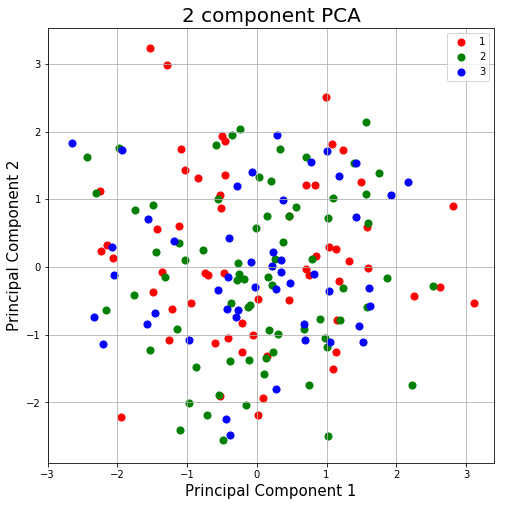

In [18]:
# Visualising the final DF
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Customer_Segment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()